In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import pandas as pd
import pdb

import matplotlib.pyplot as plt

#Define Computer
Malphigui=1
if Malphigui:
    directory='/home/pdavid/Bureau/Hybrid_2D_beta//Code' #Malpighi
    directory_script='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/base'
else: #Auto_58
    directory='/home/pdavid/Bureau/Code/Updated_BCs_2/Code/'
    directory_script='/home/pdavid/Bureau/Code/Updated_BCs_2/Figures_and_Tests/base'
    
    
os.chdir(directory)
csv_directory=directory_script+'/csv_outputs'
from Testing import extract_COMSOL_data

COMSOL_lin_dir=directory_script + '/COMSOL_output/linear'
COMSOL_metab_dir=directory_script + '/COMSOL_output/metab'

array_of_cells=np.squeeze(pd.read_csv(csv_directory + '/array_of_cells.csv').to_numpy())
print('range cells=',array_of_cells)

alpha=50

h=alpha/array_of_cells
print(h)

#Only for the odds (since the source is in hte center)
indexes=np.array([], dtype=int)
for i in range(len(array_of_cells)):
    if array_of_cells[i]%2:
        indexes=np.append(indexes, i)

range cells= [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
[16.66666667 12.5        10.          8.33333333  7.14285714  6.25
  5.55555556  5.          4.54545455  4.16666667  3.84615385  3.57142857
  3.33333333  3.125       2.94117647  2.77777778  2.63157895  2.5
  2.38095238  2.27272727  2.17391304  2.08333333  2.        ]


In [10]:
if Malphigui: print("YOU ARE IN MALPHIGUI")
print("Directory script: ", directory_script)
print("COMSOL_lin_dir: ", COMSOL_lin_dir)
print("csv_directory: ", csv_directory)

YOU ARE IN MALPHIGUI
Directory script:  /home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/base
COMSOL_lin_dir:  /home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/base/COMSOL_output/linear
csv_directory:  /home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/base/csv_outputs


In [11]:
print(indexes)
print(array_of_cells[indexes])

[ 0  2  4  6  8 10 12 14 16 18 20 22]
[ 3  5  7  9 11 13 15 17 19 21 23 25]


In [12]:
COMSOL_metab_dir
h=alpha/array_of_cells
print(h)

[16.66666667 12.5        10.          8.33333333  7.14285714  6.25
  5.55555556  5.          4.54545455  4.16666667  3.84615385  3.57142857
  3.33333333  3.125       2.94117647  2.77777778  2.63157895  2.5
  2.38095238  2.27272727  2.17391304  2.08333333  2.        ]


In [13]:
q_FEM_linear, phi_FEM_linear, FEM_x_linear, FEM_y_linear, FEM_x_1D_linear, FEM_y_1D_linear, x_1D_linear, y_1D_linear = extract_COMSOL_data(COMSOL_lin_dir, [1,1,1])

q_FEM_metab, phi_FEM_metab, FEM_x_metab, FEM_y_metab, FEM_x_1D_metab, FEM_y_1D_metab, x_1D_metab, y_1D_metab = extract_COMSOL_data(COMSOL_metab_dir, [1,1,1])



In [14]:
q_Multi_linear=pd.read_fwf(csv_directory + '/q_Multi_linear.csv').to_numpy()
q_Multi_metab=pd.read_fwf(csv_directory + '/q_Multi_metab.csv').to_numpy()
q_FV_metab=pd.read_fwf(csv_directory + '/q_FV_metab.csv').to_numpy()
q_FV_linear=pd.read_fwf(csv_directory + '/q_FV_linear.csv').to_numpy()
q_Multi_linear=pd.read_fwf(csv_directory + '/q_Multi_linear.csv').to_numpy()
phi_Multi_FEM_linear=pd.read_fwf(csv_directory + '/phi_Multi_FEM_linear.csv').to_numpy()
phi_Multi_FEM_metab=pd.read_fwf(csv_directory + '/phi_Multi_FEM_metab.csv').to_numpy()
err_phi_Multi_linear=pd.read_fwf(csv_directory + '/err_phi_Multi_linear.csv').to_numpy()
err_phi_Multi_metab=pd.read_fwf(csv_directory + '/err_phi_Multi_metab.csv').to_numpy()
err_phi_FV_linear=pd.read_fwf(csv_directory + '/err_phi_FV_linear.csv').to_numpy()
err_q_Multi_linear=pd.read_fwf(csv_directory + '/err_q_Multi_linear.csv').to_numpy()
err_q_Multi_metab=pd.read_fwf(csv_directory + '/err_q_Multi_metab.csv').to_numpy()
err_q_FV_metab=pd.read_fwf(csv_directory + '/err_q_FV_metab.csv').to_numpy()



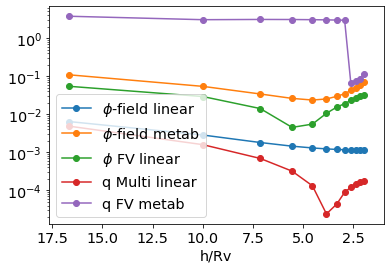

In [15]:
plt.plot(h[indexes], err_phi_Multi_linear[indexes],'-o', label='$\phi$-field linear')
plt.plot(h[indexes],err_phi_Multi_metab[indexes] ,'-o', label='$\phi$-field metab')
plt.plot(h[indexes], err_phi_FV_linear[indexes],'-o', label='$\phi$ FV linear')
plt.plot(h[indexes], err_q_Multi_linear[indexes], '-o',label='q Multi linear')
plt.plot(h[indexes], err_q_FV_metab[indexes],'-o', label='q FV metab')
plt.xlim(max(h)+1, min(h)-1)
plt.yscale('log')
plt.xlabel('h/Rv')
plt.legend()



In [ ]:
plt.plot(h[indexes],np.array(q_Multi_linear)[indexes],'-o' ,label='q_Multi')
plt.legend()
plt.xlabel('h/R')
plt.xlim(max(h)+1, min(h)-1)
plt.ylabel('q [$\mu mol \mu m^{-1} s^{-1}$]')
plt.axhline(y = q_FEM_linear, color = 'b', linestyle = '--', label='q_FEM')
plt.title('Flux estimation linear model')
plt.show()

plt.axhline(y = q_FEM_metab, color = 'b', linestyle = '--', label='q_FEM')
plt.plot(h[indexes], np.array(q_Multi_metab)[indexes],'-o', label='q_Multi')
plt.legend()
plt.xlabel('h/Rv')
plt.xlim(max(h)+1, min(h)-1)
plt.ylabel('q [$\mu mol \mu m^{-1} s^{-1}$]')
plt.title('Flux estimation non linear model')
plt.show()

In [ ]:
indexes

In [ ]:
plt.tricontourf(phi_Multi_cart_linear['x'], phi_Multi_cart_linear['y'], phi_Multi_cart_linear['phi'], levels=100)
plt.title('Contour Multi linear model')
plt.colorbar()
plt.show()

plt.tricontourf( FEM_x_linear/1e6, FEM_y_linear/1e6,FEM_phi_linear, levels=100)
plt.title('Contour FEM linear model')
plt.colorbar()
plt.show()

plt.tricontourf( FEM_x_linear/1e6, FEM_y_linear/1e6,FEM_phi_linear-phi_Multi_FEM_linear['phi'], levels=100)
plt.title('Absolute error model + reconstruction')
plt.colorbar()
plt.show()


In [ ]:
plt.tricontourf(phi_Multi_cart_metab['x'], phi_Multi_cart_metab['y'], phi_Multi_cart_metab['phi'], levels=100)
plt.title('Contour Multi metab model')
plt.colorbar()
plt.show()

plt.tricontourf( FEM_x_metab/1e6, FEM_y_metab/1e6,FEM_phi_metab, levels=100)
plt.title('Contour FEM metab model')
plt.colorbar()
plt.show()

plt.tricontourf( FEM_x_metab/1e6, FEM_y_metab/1e6,FEM_phi_metab-phi_Multi_FEM_metab['phi'], levels=100)
plt.title('Absolute error model + reconstruction')
plt.colorbar()
plt.show()